<a href="https://colab.research.google.com/github/basmalasaaad176/DeeplearningProject/blob/main/Copy_of_churnProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Customer Churn Prediction**







In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV














# **Read the** **Data**

In [ ]:
churn=pd.read_csv('/content/Churn_Modelling.csv')    #path of data.csv

#**Explore , understand and get values of the dataset to plan data cleaning**



In [ ]:
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27.0,2,134603.88,1,1,1,71725.73,0


#**Identify any potential problems, such as missing data or data types  are not compatible**


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        4999 non-null   int64  
 1   CustomerId       4999 non-null   int64  
 2   Surname          4999 non-null   object 
 3   CreditScore      4999 non-null   int64  
 4   Geography        4999 non-null   object 
 5   Gender           4999 non-null   object 
 6   Age              4877 non-null   float64
 7   Tenure           4999 non-null   int64  
 8   Balance          4999 non-null   float64
 9   NumOfProducts    4999 non-null   int64  
 10  HasCrCard        4999 non-null   int64  
 11  IsActiveMember   4999 non-null   int64  
 12  EstimatedSalary  4999 non-null   float64
 13  Exited           4999 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 546.9+ KB


#**summary of the statistical distribution of the data and identify outliers**



In [ ]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,4999.000000,4.999000e+03,4999.000000,4877.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,1.569033e+07,650.258652,38.977035,5.009602,77067.346095,1.523105,0.708542,0.509902,100362.916121,0.209242
std,1443.231328,7.159303e+04,97.534561,10.590051,2.879727,62414.441541,0.582024,0.454480,0.499952,57698.234956,0.406808
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1250.500000,1.562816e+07,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50903.280000,0.000000
50%,2500.000000,1.569001e+07,652.000000,37.000000,5.000000,97473.870000,1.000000,1.000000,1.000000,100601.730000,0.000000
75%,3749.500000,1.575236e+07,717.500000,44.000000,7.000000,128034.365000,2.000000,1.000000,1.000000,149118.255000,0.000000
max,4999.000000,1.581566e+07,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


#**Remove unwanted columns 'RowNumber' and 'Surname' and 'CustomerId'**




In [ ]:
#The axis=1 argument tells Pandas to drop the columns, rather than the rows.
churn = churn.drop(['RowNumber', 'Surname','CustomerId'], axis=1)

#The index=False argument tells Pandas not to include the index column in the .csv file.
churn.to_csv('Churn_Modelling.csv', index=False)

#**Verify that the removal was successful**




In [ ]:
if 'RowNumber' not in churn and 'Surname' not in churn and 'CustomerId' not in churn:
    print('The RowNumber ,Surname and CustomerId columns have been removed.')

else:
    print('The RowNumber , Surname and CustomerId columns have not been removed.')

The RowNumber ,Surname and CustomerId columns have been removed.


# **Replace the missing value in column 'Age' with mean**

In [ ]:
# 'inplace=True' argument  will make changes to the DataFrame without creating a new one.
churn['Age'].fillna(churn['Age'].mean(), inplace=True)

# **check if  'Age' column have no missing value**

In [ ]:
#the any() method is  to check if any element in the isnull() method of the Age column of the DataFrame churn is true.
if churn['Age'].isnull().any():
    print('There is a missing value in the "Age" column.')

else:
    print('There is no missing value in the "Age" column.')

There is no missing value in the "Age" column.


# **Convert 'Gender' column from text to numeric**

In [ ]:
# Create a dictionary to map gender to a number
gender_map = {'Male': 0, 'Female': 1}

# Convert the gender column to a number by replacing all instances of "Male"  with 0 and all instances of "Female"  with 1.
churn['Gender'] = churn['Gender'].map(gender_map)

# Write the DataFrame to a new .csv file
churn.to_csv('Churn_Modelling.csv', index=False)

# **Check if the 'gender' column is now numeric**


In [ ]:
# dtype--> get the data type of the object
if churn['Gender'].dtype == 'int64':
    print('The gender column is now numeric.')

else:
    print('The gender column is not numeric.')

The gender column is now numeric.


# **Convert 'Geography' column from text to numeric**

In [ ]:
# Create a dictionary to map Geography to a number
Geography_map = {'France': 1, 'Spain': 2, 'Germany': 3}

# Convert the Geography column to a number
churn['Geography'] = churn['Geography'].map(Geography_map)

# Write the DataFrame to a new .csv file
churn.to_csv('Churn_Modelling.csv', index=False)

# **Check  Geography column  become numeric**

In [ ]:
# dtype--> get the data type of the object
if churn['Geography'].dtype == 'int64':
    print('The Geography column is now numeric.')

else:
    print('The Geography column is not numeric.')

The Geography column is now numeric.


#**Visualization**

#**Scatter chart**

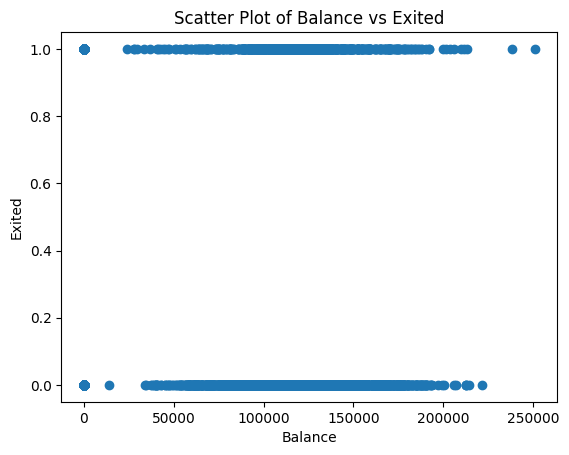


The correlation between Balance and Exited is 0.09857033062219635


In [ ]:
# Create the scatter plot
plt.scatter(churn['Balance'], churn['Exited'])

# Set the title and labels
plt.title('Scatter Plot of Balance vs Exited')
plt.xlabel('Balance')
plt.ylabel('Exited')

# Show the plot
plt.show()

# Print the result of the chart
print('\nThe correlation between Balance and Exited is', churn['Balance'].corr(churn['Exited']))

#**Bar chart**

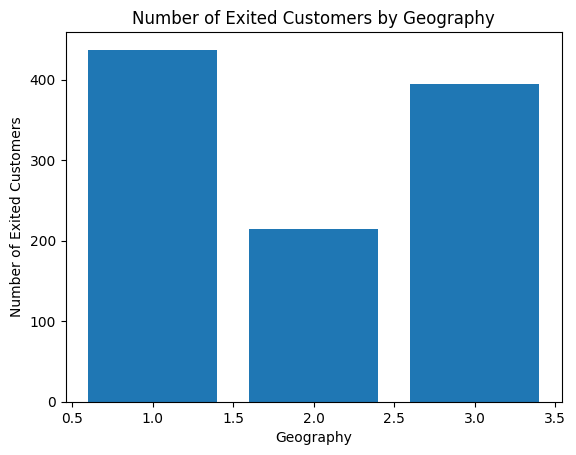

In [ ]:
# Group the data by geography and count the number of exited customers by geography
exited_by_geography = churn.groupby('Geography')['Exited'].sum()

#The index attribute-->  names of the geographies ,The values attribute--> number of exited customers for each geography.
# Create a bar chart of the exited customers by geography
plt.bar(exited_by_geography.index, exited_by_geography)

# Set the title and labels
plt.title('Number of Exited Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Exited Customers')

# Show the plot
plt.show()

#**Pie chart for Gender column**

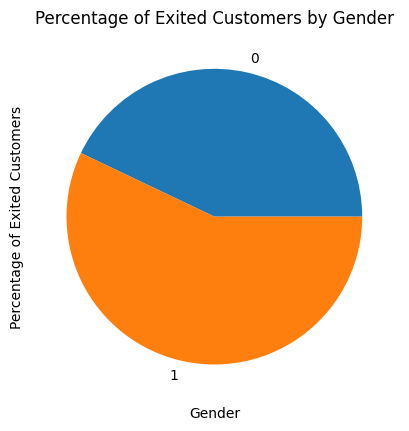

In [ ]:
 #Group the data by gender and count the number of exited customers
exited_by_gender = churn.groupby('Gender')['Exited'].sum()

# Calculate the percentage of exited customers by gender
percentage_exited_by_gender = exited_by_gender / len(churn)


#The len()--> returns the length of a pandas series , The labels-->the names of the genders
# Create a pie chart of the percentage of exited customers by gender
plt.pie(percentage_exited_by_gender, labels=exited_by_gender.index)

# Set the title and labels
plt.title('Percentage of Exited Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Exited Customers')

# Show the plot
plt.show()

#**Histogram chart**

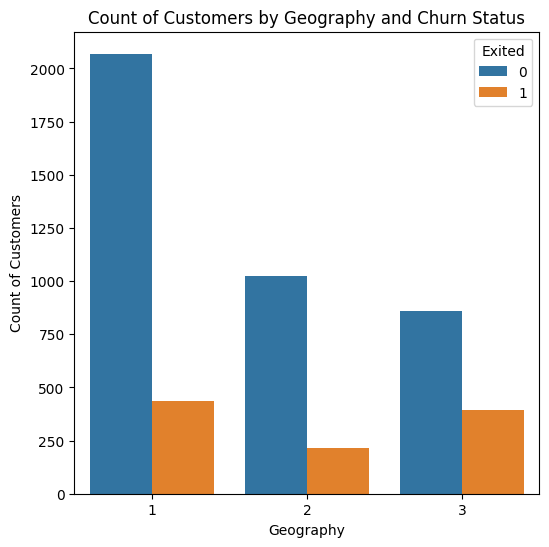

In [ ]:
#creates a figure and an axes object. The axes object is used to plot the data.
#plt.subplots()--> takes two arguments: the figure size , the number of rows and columns .
fig, ax = plt.subplots(figsize=(6, 6))

# Create the countplot , the hue variable--> the column that is used to color the bars
sns.countplot(x='Geography', hue = 'Exited',data = churn, ax=ax)

# Set the title and labels
plt.title('Count of Customers by Geography and Churn Status')
plt.xlabel('Geography')
plt.ylabel('Count of Customers')

# Show the plot
plt.show()

**Pie chart for Exited**

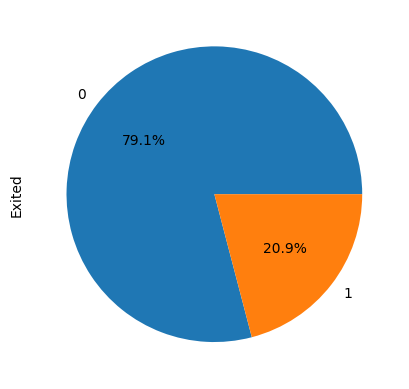

In [ ]:
#autopct='%1.1f%%'-->format the percentages in the pie chart to one decimal place and to add a percent sign (%)

churn['Exited'].value_counts().plot.pie(autopct='%1.1f%%')

# Show the plot
plt.show()

\# **Split the DataFrame into a training set=75% and a testing set=25%**


In [ ]:
#The x variable --> independent variables,
X = churn.drop('Exited', axis=1)

#The y variable --> dependent'Target' variable.
y = churn['Exited']

#The random_state parameter is used to ensure that the data is split randomly.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shape of the training set-->(row,column)
print(X_train.shape)

# Print the shape of the testing set-->(row,column)
print(X_test.shape)

(3749, 10)
(1250, 10)


#**Execute the Model**

In [ ]:
"""

# Define the features and target variable
features = X
target = y
# Train the random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(features, target)

# Now, when predicting, ensure that the feature names match the ones used during training

# Ask the user to enter values for all columns except Exited
churn = pd.DataFrame(columns=features.columns)
for column in churn.columns:
    user_input = input('Enter a value for the column "{}": '.format(column))
    churn[column] = [float(user_input)]

# Predict whether the customer will churn
prediction = rf_classifier.predict(churn)

# Print the prediction
print('The customer is predicted to', 'churn' if prediction[0] == 1 else 'not churn')
"""

Enter a value for the column "CreditScore": 1
Enter a value for the column "Geography": 1
Enter a value for the column "Gender": 1
Enter a value for the column "Age": 1
Enter a value for the column "Tenure": 1
Enter a value for the column "Balance": 1
Enter a value for the column "NumOfProducts": 1
Enter a value for the column "HasCrCard": 1
Enter a value for the column "IsActiveMember": 1
Enter a value for the column "EstimatedSalary": 1
The customer is predicted to not churn


#**Random Forest Model**


In [ ]:
""""
# Create a Random Forest classifier
# n_estimators=100 --> 100 decision trees
rf_classifier = RandomForestClassifier(n_estimators=200,random_state=42)

# fit-->Train the model
rf_classifier.fit(X_train, y_train)



# predict -->Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# evaluate the performance of a model.

#accuracy_score --> comparing the predicted labels (y_pred) with the actual labels (y_test).
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# average of the absolute differences between the predicted values and the actual values
mae = mean_absolute_error(y_test, y_pred)
print('\nMean absolute error:', mae)




Accuracy: 0.8728

Mean absolute error: 0.1272


#**parameter tuning**

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter space
param_dist = {'n_estimators': [50, 100, 200],
              'max_depth': [10, 20, 30, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform a randomized search over the parameter space
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=100, cv=5, random_state=42)

# Fit the randomized search to the training data
rf_random.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters:', rf_random.best_params_)
print('Best score:', rf_random.best_score)

Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


AttributeError: ignored